# Previsão de Preços de Casas na Califórnia com Regressão Linear

#### Importações

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
import numpy as np

#### Funções

In [2]:
# Função para imprimir separadores
def ps():
    print('\n\n'+ '#*40' +'\n\n')

#### Carregar base de dados e verificar informações

In [3]:
# Carregar base de dados
data = fetch_california_housing()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

Tamanho do dataset (linhas, colunas):  (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422




#*40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


#*40


Todos os valores foram preenchidos no DataFrame


#*40


Informações dos preços:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64


#*40




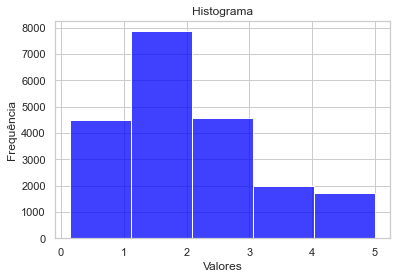

In [5]:
# Verificar informações
print('Tamanho do dataset (linhas, colunas): ', df.shape)
display(df.head())
ps()

print(df.info())
ps()

nan_value = df.isna().any().any()
if nan_value:
    print('Há algum valor nulo no DataFrame')
else:
    print('Todos os valores foram preenchidos no DataFrame')
ps()

print('Informações dos preços:')
print(df['target'].describe())
ps()

# Plotar histograma dos atributos em relação ao preço
sns.set(style='whitegrid')
sns.histplot(df['target'], bins=5, kde=False, color='blue')
plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

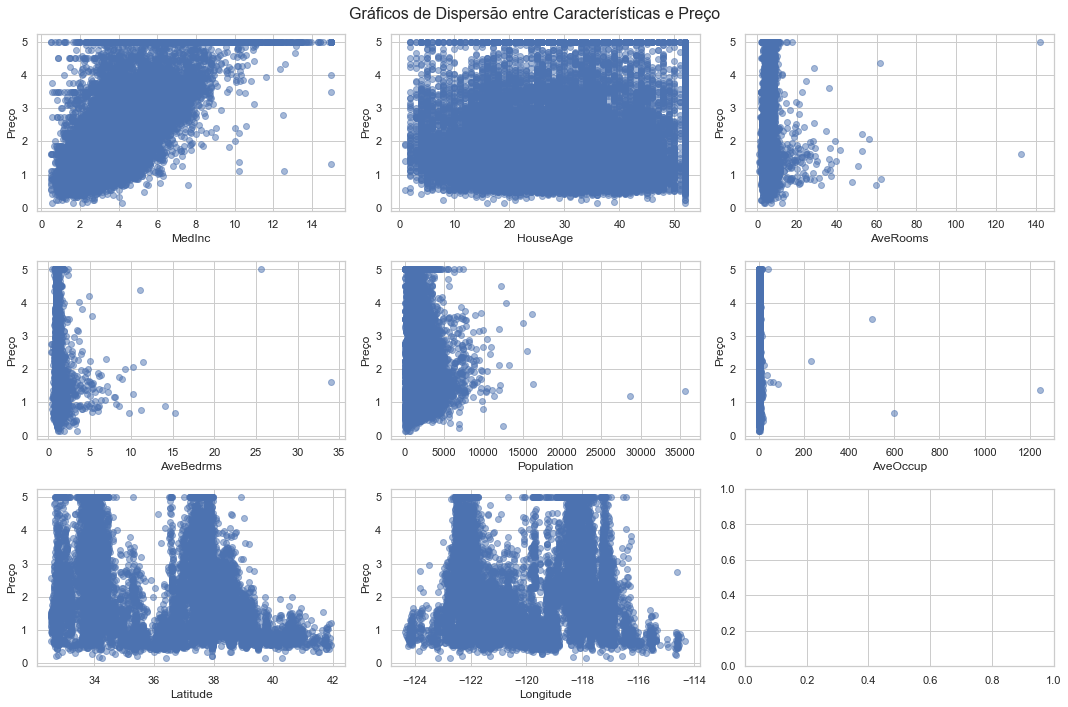

In [6]:
# Plotar um gráfico de dispersão para cada característica em relação ao preço
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.suptitle('Gráficos de Dispersão entre Características e Preço', fontsize=16) # Super título

for i, feature in enumerate(df.columns[:-1]):
    ax = axes[i//3, i%3]
    ax.scatter(df[feature], df['target'], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('Preço')
plt.tight_layout()
plt.show()

#### Preparar dados para serem treinados

In [7]:
X = df.drop('target', axis=1) # Atributos são todas as colunas exceto 'target'
y = df['target'] # Classe é a coluna 'target'

In [8]:
# Pré-processamento de dados com StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Separar dados para treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Treinar modelo

In [10]:
# Treinar dados com Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Previsão dos preços através dos atributos testes
y_pred = model.predict(X_test)

#### Avaliar modelo 

In [12]:
# Avaliar utilizando o MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.3f}')

Mean Squared Error (MSE): 0.556


In [13]:
# Comparar algumas amostras
index = np.random.choice(len(X_test), 10, replace=False)

X_sample_test = X_test[index]
y_sample_pred = model.predict(X_sample_test) 
y_sample_test = y_test.iloc[index]

comparision = pd.DataFrame({'Real': y_sample_test, 'Previsto': y_sample_pred}).reset_index(drop=True)
comparision

,Real,Previsto
0,1.833,2.115822
1,2.832,3.272701
2,2.444,1.045447
3,1.994,2.729865
4,1.625,1.582671
5,1.906,2.536511
6,3.048,2.270638
7,3.086,2.664761
8,0.994,1.503227
9,2.737,2.703922
